# US Mass Shootings #


Analyzing data from US mass shootings [Kaggle dataset](https://www.kaggle.com/zusmani/us-mass-shootings-last-50-years), [Mother Jones dataset](http://www.motherjones.com/politics/2012/12/mass-shootings-mother-jones-full-data/)

I'm not affiliated with any organizations. Hopefully, this information will help people get insights on mass shootings and help other people.

All of the graphs and information are completely free to use, if you have any questions, please contact me at <nikolaevra@gmail.com>

## Part 1 - The Kaggle Dataset

In [3]:
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('processing/datasets/Mass Shootings Dataset.csv')

dataset.iloc[115:120, :].style

## Basic analytics:

In [2]:
%matplotlib inline

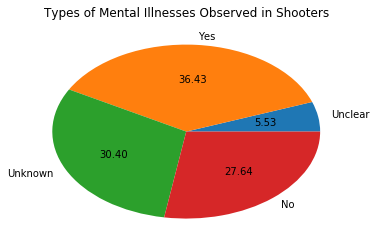

In [4]:
import matplotlib.pyplot as plt

m_illness = dataset.iloc[:, 7].values

# categorize all of the types of illnesses
ill_dict = dict()

for item in m_illness:
    if item not in ill_dict:
        ill_dict[item] = 1
    else:
        ill_dict[item] += 1

all_illnesses = list(ill_dict.keys())
n_per_illness = list(ill_dict.values())

# plot the results
plt.pie(n_per_illness, labels=all_illnesses, autopct='%.2f')
plt.title('Types of Mental Illnesses Observed in Shooters')
plt.show()

Judge this graph for your self, but from what I see there is no distict dominance of people with mental illnesses that have caused mass shootings, so lets move on and look for some other attributes that might help us make the classification

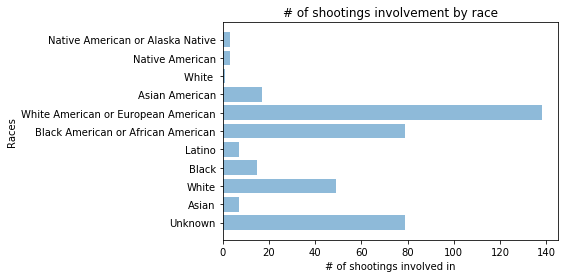

In [15]:
# categorize data to make comparisons faster
race = dataset.iloc[:, 8].values

# create a dictionary to count for each category
race_dict = dict()

for item in race:
    if item not in race_dict:
        race_dict[item] = 1
    else:
        race_dict[item] += 1

races = list(race_dict.keys())
num_races = list(race_dict.values())
y_pos = np.arange(len(races))

bars = plt.barh(y_pos, num_races, align='center', alpha=0.5)
plt.yticks(y_pos, races)
plt.ylabel("Races")
plt.xlabel("# of shootings involved in")
plt.title('# of shootings involvement by race')

plt.show()

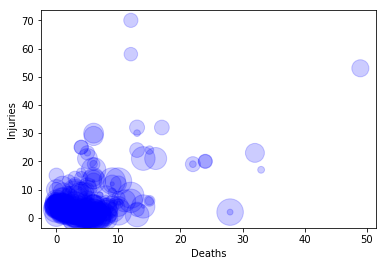

In [10]:
dead = dataset.iloc[:, 4].values
injured = dataset.iloc[:, 5].values

import numpy as np

# Fixing random state for reproducibility
np.random.seed(123456789)

# adjust area of the circle with the number of fatalities
N = 50
area = np.pi * (15 * np.random.rand(N))**2

plt.scatter(dead[1:], injured[1:], s=area, c='blue', alpha=0.2)
plt.xlabel("Deaths")
plt.ylabel("Injuries")
plt.show()

* The scatter plot above helps to see the mean size of a shooting, which ranges around 5 fatalities and 5 injuries per shooting. 
**Note:** this scatter plot does not include one of the most recent shooting, the Las Vegas one

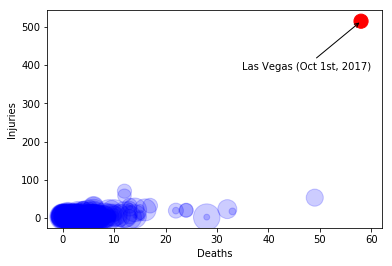

In [13]:
# plot everything exept for the most recent one in blue
plt.scatter(dead[1:], injured[1:], s=area, c='blue', alpha=0.2)

# plot the most recent shooting in red
plt.scatter(dead[0], injured[0], s=area, c='red', alpha=1)

# add a label for the shooting in Las Vegas
plt.annotate("Las Vegas (Oct 1st, 2017)", xy=(dead[0], injured[0]), xytext=(10, -50),
        textcoords='offset points', ha='right', va='bottom',
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

plt.xlabel("Deaths")
plt.ylabel("Injuries")
plt.show()

To provide the sense of scale of the Las Vegas shooting, it has been plotted in red. Right away, you notice how it surpasses any of the previous shootings in the number of Fatalities and injuries.

32


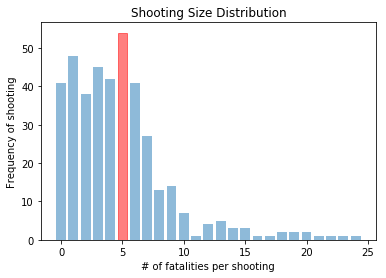

In [48]:
import collections
import statistics as s

# create a dictionary to count for each category
fatal_dict = dict()

for item in dead:
    if item not in fatal_dict:
        fatal_dict[item] = 1
    else:
        fatal_dict[item] += 1

# sort elements in the dictionary in increasing order
ordered_dict = collections.OrderedDict(sorted(fatal_dict.items()))

# converting dictionary into a list
deaths = list(ordered_dict.keys())
num_deaths = list(ordered_dict.values())
elem_count = np.arange(len(deaths))

# find mean and variance
mean = s.mean(dead)
var = s.variance(dead)

bars = plt.bar(elem_count, num_deaths, align='center', alpha=0.5)
bars[mean].set_color('r')

plt.ylabel("Frequency of shooting")
plt.xlabel("# of fatalities per shooting")
plt.title('Shooting Size Distribution')

plt.show()

The red bar in the graph above is the average value, while all of the other statistic measuremenst can be found below

In [49]:
mean = s.mean(dead)
var = s.variance(dead)
mode = s.mode(dead)
st_dev = s.stdev(dead)

print('Mean: {0}\nVariance: {1}\nMode: {2}\nStandard Deviation: {3}'.format(mean, var, mode, st_dev))

Mean: 5
Variance: 32
Mode: 5
Standard Deviation: 5.656854249492381


## Shootings Heatmap

In [7]:
%%HTML
<iframe width="900" height="800" frameborder="0" scrolling="no" src="//plot.ly/~nikolaevra/10.embed"></iframe>

Now, lets try to look at something like time series, how did the mass shootings change over time?

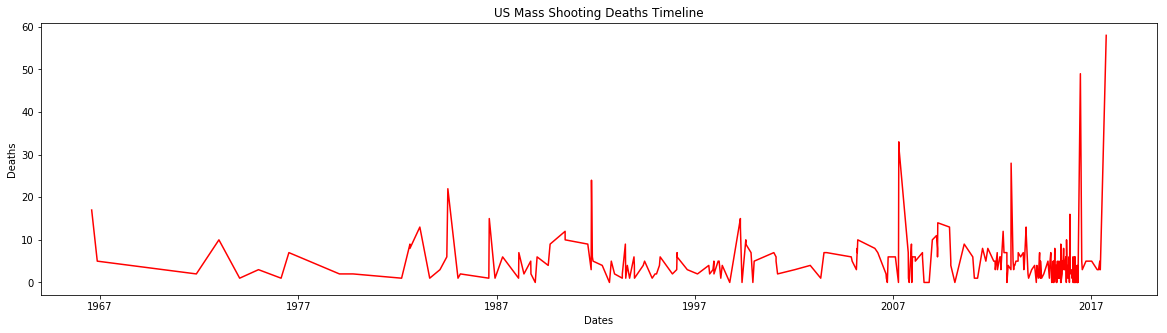

In [8]:
dates = dataset.iloc[:, 3].values

plt.figure(figsize=(20, 5))
plt.plot_date(x=dates, y=dead, fmt="r-")
plt.title("US Mass Shooting Deaths Timeline")
plt.ylabel("Deaths")
plt.xlabel("Dates")
plt.show()

Looks like the frequency has increased significantly after around 2010